IMPORTS

In [1]:
import tensorflow as tf
import numpy as np

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

This model features the Resnet50 Architecture on the Cifar10 Dataset

In [2]:
inputs = tf.keras.layers.Input(shape=(32, 32, 3))
x = tf.keras.layers.UpSampling2D((2, 2))(inputs)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=x)

print("created model")

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['acc'])

(x_train, raw_y_train), (x_test, raw_y_test) = tf.keras.datasets.cifar10.load_data()

raw_y_train = raw_y_train.flatten()
raw_y_test = raw_y_test.flatten()

y_train = np.zeros((raw_y_train.size, 10))
y_train[np.arange(raw_y_train.size), raw_y_train] = 1

y_test = np.zeros((raw_y_test.shape[0], 10))
y_test[np.arange(raw_y_test.size), raw_y_test] = 1

x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)

print(x_train.shape)

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=20)

94773248/94765736 [==============================] - 1s 0us/step
created model
170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
Epoch 1/5
2500/2500 [==============================] - 718s 280ms/step - loss: 1.6287 - acc: 0.4571 - val_loss: 0.4775 - val_acc: 0.8601
Epoch 2/5
2500/2500 [==============================] - 708s 283ms/step - loss: 0.6930 - acc: 0.7953 - val_loss: 0.2935 - val_acc: 0.9136
Epoch 3/5
2500/2500 [==============================] - 708s 283ms/step - loss: 0.4504 - acc: 0.8778 - val_loss: 0.2245 - val_acc: 0.9315
Epoch 4/5
2500/2500 [==============================] - 707s 283ms/step - loss: 0.3158 - acc: 0.9192 - val_loss: 0.2067 - val_acc: 0.9365
Epoch 5/5
2500/2500 [==============================] - 709s 284ms/step - loss: 0.2318 - acc: 0.9441 - val_loss: 0.1887 - val_acc: 0.9407


In [3]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 41s 128ms/step - loss: 0.1887 - acc: 0.9407


[0.18865162134170532, 0.9406999945640564]

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


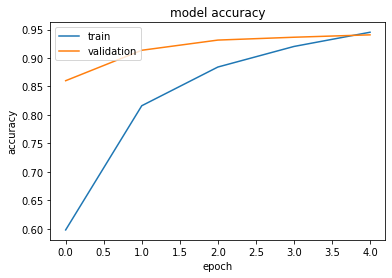

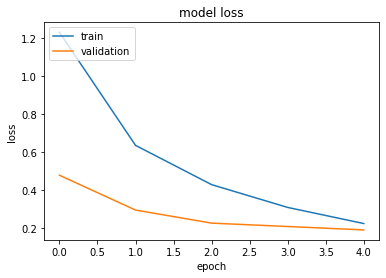

In [5]:
import matplotlib.pyplot as plt 

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()